In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
glass = pd.read_csv("glass.csv")
glass.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [3]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [4]:
# Normalized data frame (considering the numerical part of data)
df_norm1 = norm_func(glass.iloc[:,1:])
df_norm1.describe()

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.402684,0.597891,0.359784,0.507310,0.080041,0.327785,0.055570,0.111783,0.296729
std,0.122798,0.321249,0.155536,0.138312,0.105023,0.132263,0.157847,0.191056,0.350623
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.327444,0.471047,0.280374,0.441071,0.019726,0.261152,0.000000,0.000000,0.000000
50%,0.386466,0.775056,0.333333,0.532143,0.089372,0.294610,0.000000,0.000000,0.166667
75%,0.465414,0.801782,0.417445,0.585268,0.098229,0.347816,0.000000,0.196078,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 

In [6]:
z1 = linkage(df_norm1, method="complete",metric="euclidean")

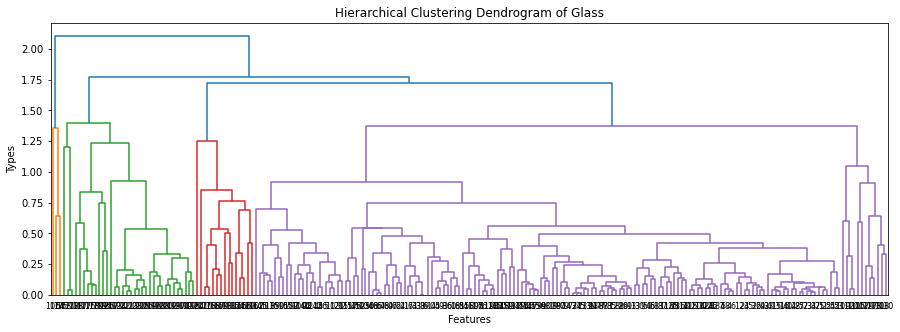

In [7]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram of Glass')
plt.xlabel('Features')
plt.ylabel('Types')
sch.dendrogram(z1,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [8]:
glass.shape

(214, 10)

In [9]:
glass.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


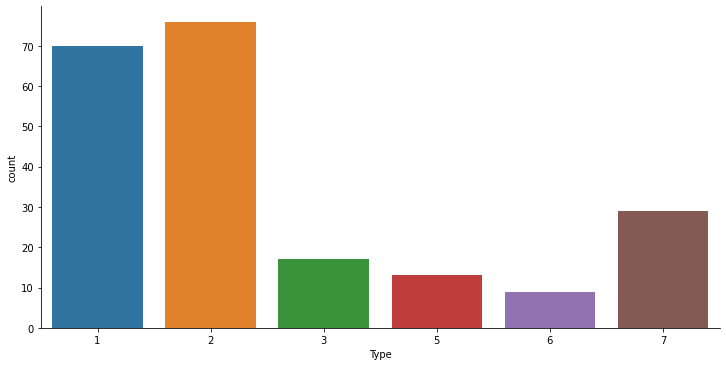

In [10]:
import seaborn as sns
sns.factorplot('Type', data=glass, kind="count",size = 5,aspect = 2)

In [11]:
#Can be seen that type of glass (4) is absent. Rest graph shows clearly.

In [12]:
from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [13]:
model1=KMeans(n_clusters=6)
model1.fit(df_norm1)

KMeans(n_clusters=6)

In [14]:
model1.labels_

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 3, 3, 3,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 4, 4, 3, 3, 3, 3, 3, 3, 5, 5, 3, 2, 3,
       4, 4, 4, 4, 4, 4, 1, 3, 1, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Standardize the Variables

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaler.fit(glass.drop('Type',axis=1))

StandardScaler()

In [18]:
scaled_features = scaler.transform(glass.drop('Type',axis=1))

In [19]:
glass1 = pd.DataFrame(scaled_features,columns=glass.columns[:-1])
glass1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


Visualizing the CV results

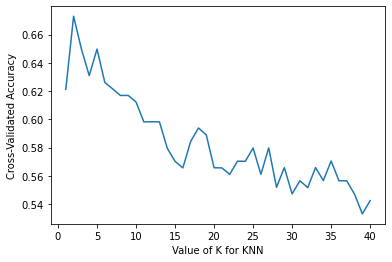

In [22]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulate different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, glass1, glass['Type'], cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()